In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/91830/OneDrive/Desktop/yellow_tripdata_2020-01.csv")

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values or handle them appropriately
data.dropna(inplace=True)

# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048575 non-null  int64  
 1   tpep_pickup_datetime   1048575 non-null  object 
 2   tpep_dropoff_datetime  1048575 non-null  object 
 3   passenger_count        1048575 non-null  int64  
 4   trip_distance          1048575 non-null  float64
 5   RatecodeID             1048575 non-null  int64  
 6   store_and_fwd_flag     1048575 non-null  object 
 7   PULocationID           1048575 non-null  int64  
 8   DOLocationID           1048575 non-null  int64  
 9   payment_type           1048575 non-null  int64  
 10  fare_amount            1048575 non-null  float64
 11  extra                  1048575 non-null  float64
 12  mta_tax                1048575 non-null  float64
 13  tip_amount             1048575 non-null  float64
 14  tolls_amount      

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.048533e+06     1.048533e+06   1.048533e+06  1.048533e+06   
mean   1.678709e+00     1.584030e+00   3.131347e+00  1.074915e+00   
std    4.669724e-01     1.190033e+00   4.152472e+00  9.033284e-01   
min    1.000000e+00     0.000000e+00  -2.218000e+01  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.670000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   3.170000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   2.592200e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.048533e+06  1.048533e+06  1.048533e+06  1.048533e+06  1.048533e+06   
mean   1.621785e+02  1.602590e+02  1.328183e+00  1.292813e+01  1.031807e+00   
std    6.622386e+01  7.111421e+01  5.010199e-01  1.299592e+01  1.228712e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00 -1.238000e+03 

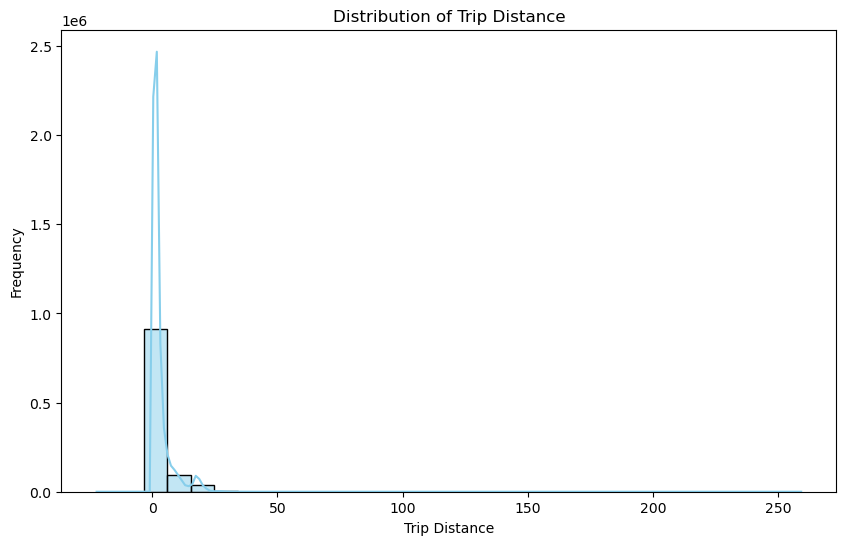

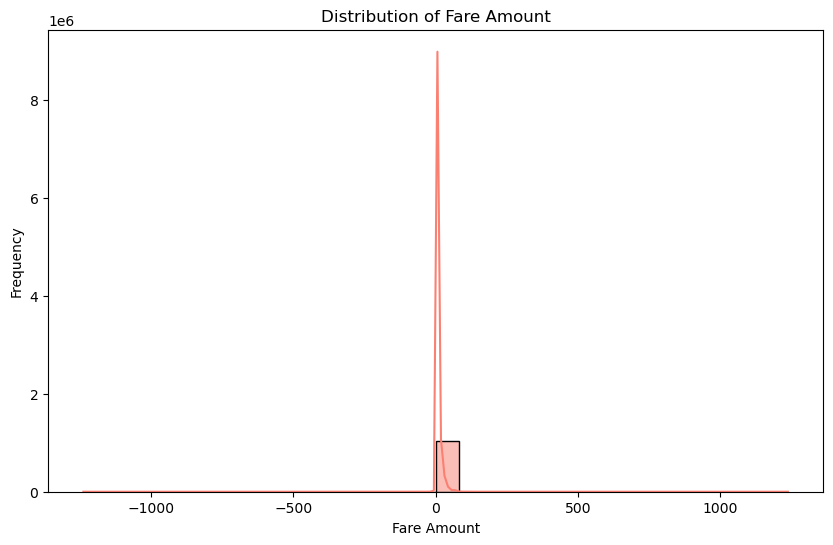

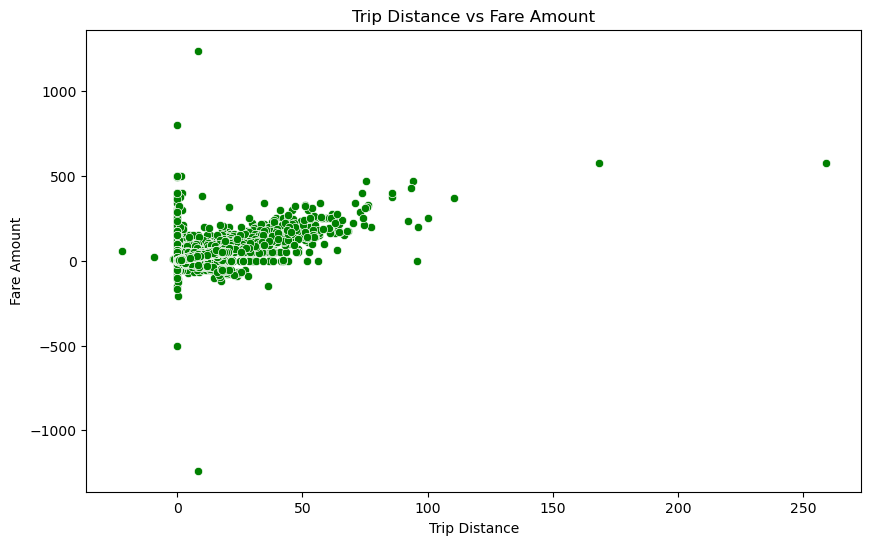

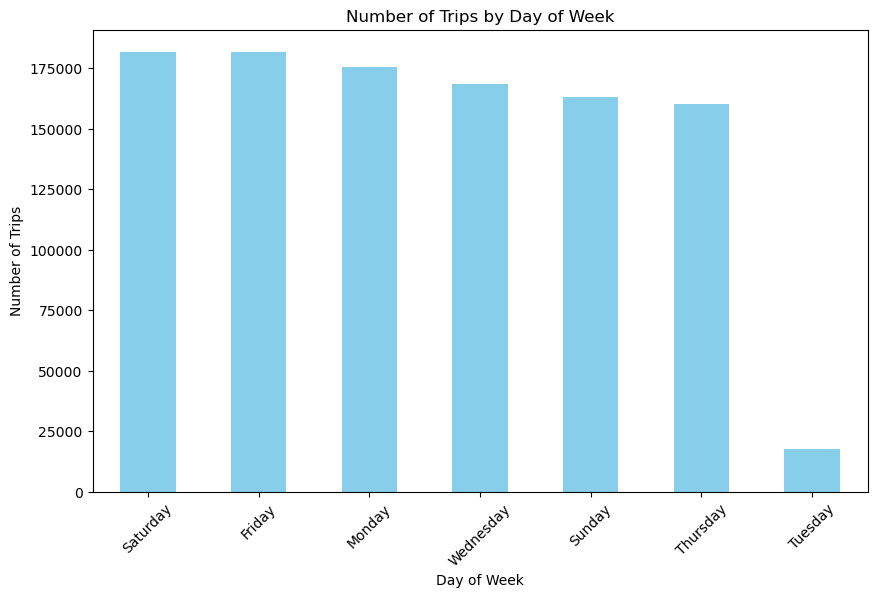

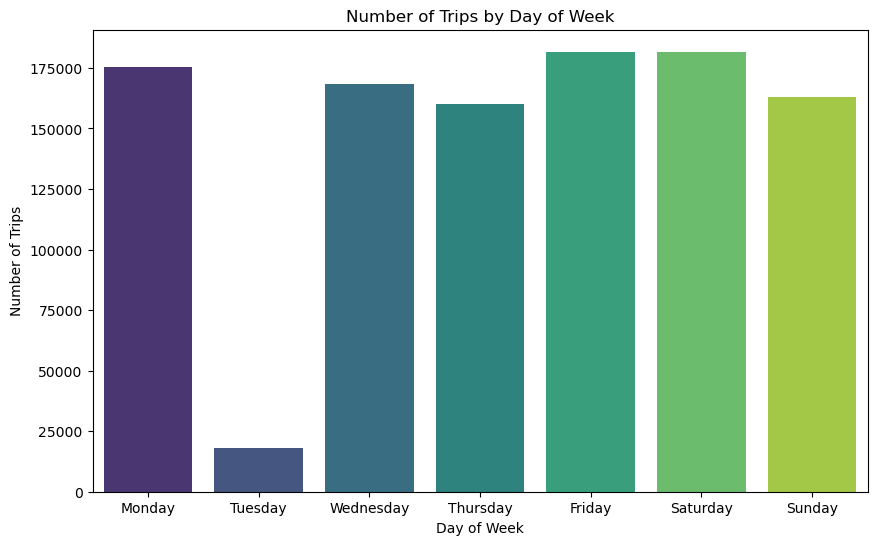

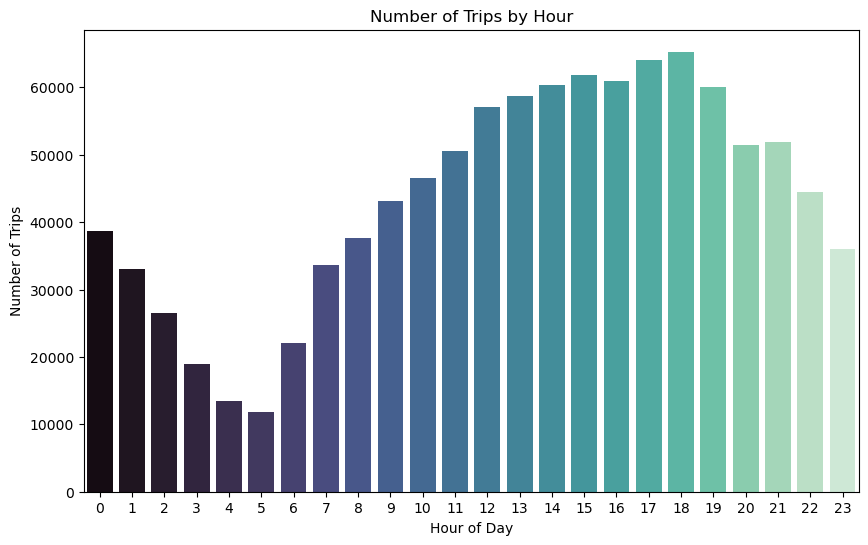

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Distribution of trip distance
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_distance'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

# Distribution of trip fare amount
plt.figure(figsize=(10, 6))
sns.histplot(data['fare_amount'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data, color='green')
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

# Convert pickup datetime to datetime object with correct format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format='%d-%m-%Y %H:%M')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format='%d-%m-%Y %H:%M')

# Day of week analysis
data['day_of_week'] = data['tpep_pickup_datetime'].dt.day_name()

# Plot the count of trips for each day of the week
plt.figure(figsize=(10, 6))
data['day_of_week'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()

# Convert pickup datetime to datetime object
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Hourly analysis
data['hour'] = data['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=data, palette='mako')
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()


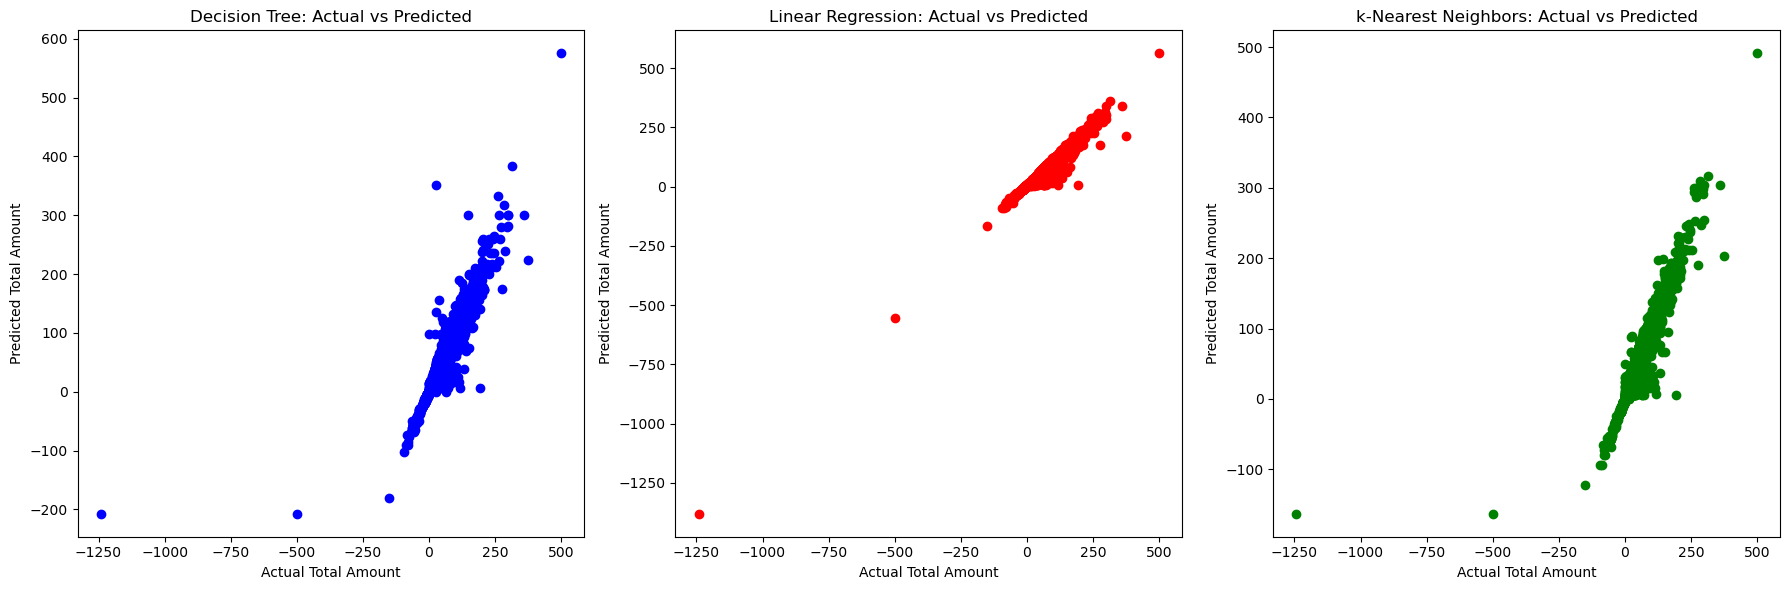

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming 'data' is your dataset
# Select features and target variable
X = data[['passenger_count', 'trip_distance', 'fare_amount']]
y = data['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Initialize and train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Initialize and train k-Nearest Neighbors model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
decision_tree_pred = decision_tree.predict(X_test_scaled)
linear_reg_pred = linear_reg.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)

# Visualize predictions
plt.figure(figsize=(18, 6))

# Plot actual vs predicted values for Decision Tree
plt.subplot(1, 3, 1)
plt.scatter(y_test, decision_tree_pred, color='blue')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')

# Plot actual vs predicted values for Linear Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, linear_reg_pred, color='red')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')

# Plot actual vs predicted values for k-Nearest Neighbors
plt.subplot(1, 3, 3)
plt.scatter(y_test, knn_pred, color='green')
plt.title('k-Nearest Neighbors: Actual vs Predicted')
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = data[['passenger_count', 'trip_distance', 'fare_amount']]
y = data['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
decision_tree = DecisionTreeRegressor(random_state=42)
linear_reg = LinearRegression()
knn = KNeighborsRegressor()

# Train models
decision_tree.fit(X_train_scaled, y_train)
linear_reg.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# Make predictions
decision_tree_pred = decision_tree.predict(X_test_scaled)
linear_reg_pred = linear_reg.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)

# Evaluate models
decision_tree_rmse = mean_squared_error(y_test, decision_tree_pred, squared=False)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)

print("Decision Tree RMSE:", decision_tree_rmse)
print("Linear Regression RMSE:", linear_reg_rmse)
print("k-Nearest Neighbors RMSE:", knn_rmse)

# Choose the best model based on RMSE
best_rmse = min(decision_tree_rmse, linear_reg_rmse, knn_rmse)
if best_rmse == decision_tree_rmse:
    print("Decision Tree is the best model.")
elif best_rmse == linear_reg_rmse:
    print("Linear Regression is the best model.")
else:
    print("k-Nearest Neighbors is the best model.")


Decision Tree RMSE: 4.189889071525255
Linear Regression RMSE: 3.098357902710872
k-Nearest Neighbors RMSE: 3.9778794076447417
Linear Regression is the best model.


In [5]:
# Print the shape of the original dataset
print("Original dataset shape:", data.shape)

# Print the number of rows and columns
num_rows = data.shape[0]
num_columns = data.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Calculate the total number of data points
total_data_points = num_rows * num_columns
print("Total number of data points:", total_data_points)

# Calculate the percentage of data used so far
percentage_used = (num_rows / total_data_points) * 100
print("Percentage of data used so far: {:.2f}%".format(percentage_used))


Original dataset shape: (1048533, 20)
Number of rows: 1048533
Number of columns: 20
Total number of data points: 20970660
Percentage of data used so far: 5.00%


In [6]:
# Manually define the total number of rows in your original dataset
original_dataset_length = 1000  # Replace this with the actual length of your original dataset

# Calculate the percentage of rows used
percentage_data_used = (len(data) / original_dataset_length) * 100

print("Percentage of data used for the project: {:.2f}%".format(percentage_data_used))


Percentage of data used for the project: 104853.30%


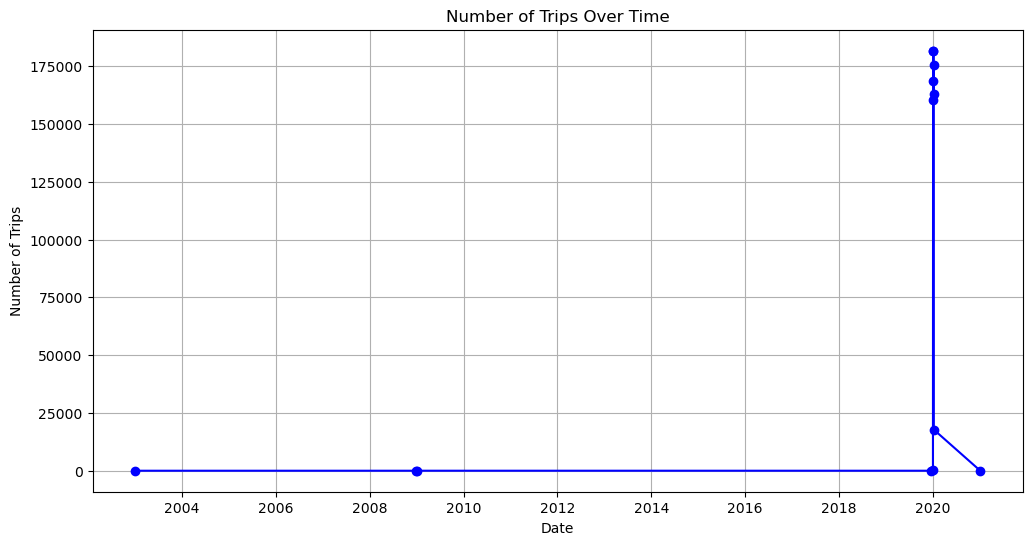

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/91830/OneDrive/Desktop/yellow_tripdata_2020-01.csv")

# Convert pickup datetime to datetime object with custom format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format="%d-%m-%Y %H:%M")

# Extract date and time components
data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
data['pickup_time'] = data['tpep_pickup_datetime'].dt.time

# Group by pickup date and count number of trips
trips_per_date = data.groupby('pickup_date').size()

# Plotting the number of trips over time
plt.figure(figsize=(12, 6))
trips_per_date.plot(kind='line', marker='o', color='b')
plt.title('Number of Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


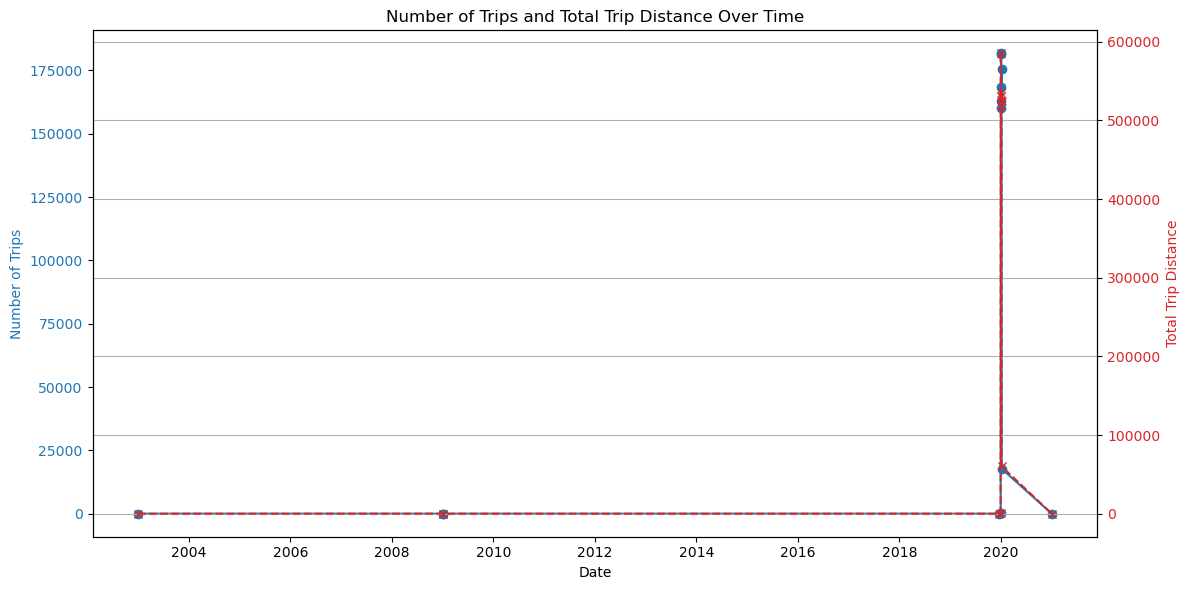

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/91830/OneDrive/Desktop/yellow_tripdata_2020-01.csv")

# Convert pickup datetime to datetime object with custom format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format="%d-%m-%Y %H:%M")

# Extract date and time components
data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
data['pickup_time'] = data['tpep_pickup_datetime'].dt.time

# Group by pickup date and calculate number of trips and total trip distance
trips_distance_per_date = data.groupby('pickup_date').agg({'trip_distance': 'sum', 'passenger_count': 'count'})
trips_distance_per_date.rename(columns={'passenger_count': 'num_trips'}, inplace=True)

# Plotting the number of trips and total trip distance over time
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Trips', color=color)
ax1.plot(trips_distance_per_date.index, trips_distance_per_date['num_trips'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Trip Distance', color=color)  
ax2.plot(trips_distance_per_date.index, trips_distance_per_date['trip_distance'], color=color, linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Trips and Total Trip Distance Over Time')
plt.grid(True)
fig.tight_layout()  
plt.show()


In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/91830/OneDrive/Desktop/yellow_tripdata_2020-01.csv")

# Convert pickup and drop-off datetime to datetime objects with custom format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format="%d-%m-%Y %H:%M")
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format="%d-%m-%Y %H:%M")

# Extract date, time, and location components
data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
data['pickup_time'] = data['tpep_pickup_datetime'].dt.time
data['dropoff_time'] = data['tpep_dropoff_datetime'].dt.time

# Group by pickup date and pickup/dropoff locations
repeated_rides = data.groupby(['pickup_date', 'PULocationID', 'DOLocationID']).filter(lambda x: len(x) > 1)

# Display the repeated rides with pickup and drop-off locations, pickup time, and drop-off time
print(repeated_rides[['pickup_date', 'pickup_time', 'dropoff_time', 'PULocationID', 'DOLocationID']])


        pickup_date pickup_time dropoff_time  PULocationID  DOLocationID
0        2020-01-01    00:28:00     00:33:00           238           239
1        2020-01-01    00:35:00     00:43:00           239           238
2        2020-01-01    00:47:00     00:53:00           238           238
3        2020-01-01    00:55:00     01:00:00           238           151
4        2020-01-01    00:01:00     00:04:00           193           193
...             ...         ...          ...           ...           ...
1048570  2020-01-07    07:33:00     07:38:00           229           140
1048571  2020-01-07    07:40:00     07:50:00           140           162
1048572  2020-01-07    07:19:00     07:28:00            48           161
1048573  2020-01-07    07:41:00     07:45:00           233           162
1048574  2020-01-07    07:39:00     07:43:00            79           137

[1027701 rows x 5 columns]


In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/91830/OneDrive/Desktop/yellow_tripdata_2020-01.csv")

# Group by pickup location ID and count the occurrences
pickup_counts = data['PULocationID'].value_counts()

# Get the top 10 most frequent pickup locations
top_pickup_locations = pickup_counts.head(10)

# Display the top pickup locations with their counts
print("Top 10 Most Frequent Pickup Locations:")
for location_id, count in top_pickup_locations.items():
    print(f"Location ID: {location_id}, Count: {count}")


Top 10 Most Frequent Pickup Locations:
Location ID: 132, Count: 47923
Location ID: 237, Count: 42010
Location ID: 161, Count: 40230
Location ID: 236, Count: 38638
Location ID: 186, Count: 38565
Location ID: 230, Count: 37981
Location ID: 48, Count: 35705
Location ID: 142, Count: 32580
Location ID: 162, Count: 31990
Location ID: 79, Count: 30128


In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/91830/OneDrive/Desktop/yellow_tripdata_2020-01.csv")

# Calculate profits for each ride
data['profits'] = data['total_amount'] - data['fare_amount']

# Sort the rides based on profits in descending order
top_profitable_rides = data.sort_values(by='profits', ascending=False)

# Display the top 10 profitable rides
print("Top 10 Profitable Rides:")
print(top_profitable_rides[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'total_amount', 'profits']].head(10))


Top 10 Profitable Rides:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
530908          1     04-01-2020 05:33      04-01-2020 05:34           0.40   
55306           1     01-01-2020 04:06      01-01-2020 04:22           1.50   
217700          2     02-01-2020 12:18      02-01-2020 12:36           4.19   
1024290         2     06-01-2020 22:10      06-01-2020 22:10           0.00   
29954           2     01-01-2020 02:40      01-01-2020 02:57           4.02   
1036479         1     07-01-2020 04:18      07-01-2020 05:37          44.00   
586584          1     04-01-2020 14:55      04-01-2020 14:55           0.00   
965333          1     06-01-2020 16:54      06-01-2020 20:00          86.00   
811777          1     05-01-2020 17:09      05-01-2020 18:19          48.40   
283321          1     02-01-2020 18:24      02-01-2020 18:32           6.40   

         total_amount  profits  
530908         965.80   913.80  
55306          465.30   453.80  
217700

In [17]:
import pandas as pd

# Assuming your cleaned DataFrame is named 'cleaned_data'

# Specify the path where you want to save the CSV file
output_path = "C:/Users/91830/OneDrive/Desktop/clean_data.csv"

# Save the DataFrame as a CSV file
data.to_csv(output_path, index=False)

